In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
data = pd.read_csv('delhivery_data.csv')

In [2]:
# Display the first few rows of the dataset
data.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [3]:

# Get basic information about the dataset
data.info()

# Summary statistics
data.describe()

print(data['data'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [4]:
# Assuming data is your DataFrame with missing values
print("Missing values before handling:")
print(data.isnull().sum())

# Handle missing values (example: fill with a default value)
data['source_name'].fillna('Unknown', inplace=True)
data['destination_name'].fillna('Unknown', inplace=True)

# Verify missing values after handling
print("Missing values after handling:")
print(data.isnull().sum())


Missing values before handling:
data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64
Missing values after handling:
data        

/var/folders/2y/9wbng44n0gd0wzly39wrhxzm0000gn/T/ipykernel_53187/209052705.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['source_name'].fillna('Unknown', inplace=True)
/var/folders/2y/9wbng44n0gd0wzly39wrhxzm0000gn/T/ipykernel_53187/209052705.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

In [5]:
# Create the segment_key
data['segment_key'] = data['trip_uuid'].astype(str) + '_' + data['source_center'].astype(str) + '_' + data['destination_center'].astype(str)

# Define the aggregation dictionary
create_segment_dict = {
    'trip_uuid': 'first',
    'route_schedule_uuid': 'first',
    'route_type': 'first',
    'source_center': 'first',
    'source_name': 'first',
    'destination_center': 'first',
    'destination_name': 'first',
    'trip_creation_time': 'first',  # Include trip_creation_time in the aggregation
    'od_start_time': 'first',
    'od_end_time': 'last',
    'start_scan_to_end_scan': 'sum',
    'actual_distance_to_destination': 'sum',
    'actual_time': 'sum',
    'osrm_time': 'sum',
    'osrm_distance': 'sum',
    'segment_actual_time': 'sum',
    'segment_osrm_distance': 'sum',
    'segment_osrm_time': 'sum'
}

# Group by segment_key and apply the aggregation functions
aggregated_segment_data = data.groupby('segment_key').agg(create_segment_dict).reset_index()

# Sort the resulting DataFrame
sorted_segment_data = aggregated_segment_data.sort_values(by=['segment_key', 'od_end_time']).reset_index(drop=True)


# Feature Engineering

In [6]:

# Calculate time taken between od_start_time and od_end_time and keep it as a feature named od_time_diff_hour
sorted_segment_data['od_start_time'] = pd.to_datetime(sorted_segment_data['od_start_time'])
sorted_segment_data['od_end_time'] = pd.to_datetime(sorted_segment_data['od_end_time'])
sorted_segment_data['od_time_diff_hour'] = (sorted_segment_data['od_end_time'] - sorted_segment_data['od_start_time']).dt.total_seconds() / 3600
sorted_segment_data.drop(columns=['od_start_time', 'od_end_time'], inplace=True)

# Extract features from destination_name
destination_split = sorted_segment_data['destination_name'].str.split('_|\\(|\\)', expand=True)
sorted_segment_data = sorted_segment_data.assign(
    destination_city=destination_split[0],
    destination_place=destination_split[1],
    destination_code=destination_split[2],
    destination_state=destination_split[3]
)

# Extract features from source_name
source_split = sorted_segment_data['source_name'].str.split('_|\\(|\\)', expand=True)
sorted_segment_data = sorted_segment_data.assign(
    source_city=source_split[0],
    source_place=source_split[1],
    source_code=source_split[2],
    source_state=source_split[3]
)

# Extract features from trip_creation_time
sorted_segment_data['trip_creation_time'] = pd.to_datetime(sorted_segment_data['trip_creation_time'])
sorted_segment_data['trip_creation_year'] = sorted_segment_data['trip_creation_time'].dt.year
sorted_segment_data['trip_creation_month'] = sorted_segment_data['trip_creation_time'].dt.month
sorted_segment_data['trip_creation_day'] = sorted_segment_data['trip_creation_time'].dt.day
sorted_segment_data['trip_creation_hour'] = sorted_segment_data['trip_creation_time'].dt.hour

# Ensure all values are positive
sorted_segment_data['actual_distance_to_destination'] = sorted_segment_data['actual_distance_to_destination'].abs()
sorted_segment_data['actual_time'] = sorted_segment_data['actual_time'].abs()



# In-depth Analysis

In [7]:

# Detect outliers using IQR with a higher multiplier
continuous_columns = ['start_scan_to_end_scan', 'actual_distance_to_destination', 
                       'osrm_time', 'osrm_distance', 
                      'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance']
Q1 = sorted_segment_data[continuous_columns].quantile(0.25)
Q3 = sorted_segment_data[continuous_columns].quantile(0.75)
IQR = Q3 - Q1

# Calculate lower and upper bounds for outlier detection
lower_bound = Q1 - 3.0 * IQR
upper_bound = Q3 + 3.0 * IQR

# Filter out the outliers
filtered_data = sorted_segment_data[~((sorted_segment_data[continuous_columns] < lower_bound) | (sorted_segment_data[continuous_columns] > upper_bound)).any(axis=1)]
filtered_data.head()

,segment_key,trip_uuid,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,trip_creation_time,start_scan_to_end_scan,...,destination_code,destination_state,source_city,source_place,source_code,source_state,trip_creation_year,trip_creation_month,trip_creation_day,trip_creation_hour
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,174.0,...,D,Karnataka,Doddablpur,ChikaDPP,D,Karnataka,2018,9,12,0
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,732.0,...,D,Karnataka,Tumkur,Veersagr,I,Karnataka,2018,9,12,0
6,trip-153671046011330457_IND400072AAB_IND401104AAA,trip-153671046011330457,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,200.0,...,IP,Maharashtra,Mumbai Hub,Maharashtra,,None,2018,9,12,0
7,trip-153671052974046625_IND583101AAA_IND583201AAA,trip-153671052974046625,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),2018-09-12 00:02:09.740725,456.0,...,,None,Bellary,Dc,Karnataka,,2018,9,12,0
8,trip-153671052974046625_IND583119AAA_IND583101AAA,trip-153671052974046625,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,970.0,...,Karnataka,,Sandur,WrdN1DPP,D,Karnataka,2018,9,12,0


In [8]:
# One-hot encoding for categorical variables
categorical_columns = ['route_schedule_uuid', 'source_center', 'destination_center']
encoded_data = pd.get_dummies(filtered_data, columns=categorical_columns)

# Exclude datetime column from PCA
datetime_columns = ['trip_creation_time']
pca_columns = [col for col in encoded_data.columns if col not in datetime_columns]

# Filter out non-numeric columns if any remain
numeric_columns = encoded_data.select_dtypes(include=['number']).columns
pca_columns = list(set(pca_columns).intersection(numeric_columns))

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of variance
pca_features = pca.fit_transform(encoded_data[pca_columns])

# Initialize the scaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to continuous variables
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(encoded_data[continuous_columns])
scaled_data = pd.DataFrame(scaled_features, columns=continuous_columns)

# Update the scaled data back to the encoded data
encoded_data[continuous_columns] = scaled_data

# Verify the data after transformation
print(encoded_data.head())

                                         segment_key                trip_uuid  \
2  trip-153671042288605164_IND561203AAB_IND562101AAA  trip-153671042288605164   
3  trip-153671042288605164_IND572101AAA_IND561203AAB  trip-153671042288605164   
6  trip-153671046011330457_IND400072AAB_IND401104AAA  trip-153671046011330457   
7  trip-153671052974046625_IND583101AAA_IND583201AAA  trip-153671052974046625   
8  trip-153671052974046625_IND583119AAA_IND583101AAA  trip-153671052974046625   

  route_type                        source_name  \
2    Carting  Doddablpur_ChikaDPP_D (Karnataka)   
3    Carting      Tumkur_Veersagr_I (Karnataka)   
6    Carting           Mumbai Hub (Maharashtra)   
7        FTL             Bellary_Dc (Karnataka)   
8        FTL      Sandur_WrdN1DPP_D (Karnataka)   

                    destination_name         trip_creation_time  \
2  Chikblapur_ShntiSgr_D (Karnataka) 2018-09-12 00:00:22.886430   
3  Doddablpur_ChikaDPP_D (Karnataka) 2018-09-12 00:00:22.886430   
6    

In [9]:
# Check column names and presence of specific columns
print(encoded_data.columns)

# Sample exploration
print(encoded_data.head())

# Statistical summary
print(encoded_data.describe())

# Ensure specific columns exist before operations
if 'actual_time' in encoded_data.columns:
    # Perform operations involving 'actual_time'
    pass
else:
    print("'actual_time' column is missing.")

# Repeat similar checks for other necessary columns like 'osrm_time', 'segment_actual_time', etc.

Index(['segment_key', 'trip_uuid', 'route_type', 'source_name',
       'destination_name', 'trip_creation_time', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       ...
       'destination_center_IND852131AAA', 'destination_center_IND852139AAB',
       'destination_center_IND852201AAA', 'destination_center_IND853204AAA',
       'destination_center_IND854105AAA', 'destination_center_IND854105AAB',
       'destination_center_IND854311AAA', 'destination_center_IND854326AAB',
       'destination_center_IND854334AAA', 'destination_center_IND854335AAA'],
      dtype='object', length=4264)
                                         segment_key                trip_uuid  \
2  trip-153671042288605164_IND561203AAB_IND562101AAA  trip-153671042288605164   
3  trip-153671042288605164_IND572101AAA_IND561203AAB  trip-153671042288605164   
6  trip-153671046011330457_IND400072AAB_IND401104AAA  trip-153671046011330457   
7  trip-153671052974046625_IND583101


# Hypothesis Testing

In [10]:
# a. actual_time vs OSRM time
ttest_result_a = ttest_ind(encoded_data['actual_time'], encoded_data['osrm_time'], nan_policy='omit')
print('Hypothesis Test: actual_time vs OSRM time')
print('T-statistic:', ttest_result_a.statistic)
print('P-value:', ttest_result_a.pvalue)

# b. actual_time vs segment actual time
ttest_result_b = ttest_ind(encoded_data['actual_time'], encoded_data['segment_actual_time'], nan_policy='omit')
print('\nHypothesis Test: actual_time vs segment actual time')
print('T-statistic:', ttest_result_b.statistic)
print('P-value:', ttest_result_b.pvalue)

# c. OSRM distance vs segment OSRM distance
ttest_result_c = ttest_ind(encoded_data['osrm_distance'], encoded_data['segment_osrm_distance'], nan_policy='omit')
print('\nHypothesis Test: OSRM distance vs segment OSRM distance')
print('T-statistic:', ttest_result_c.statistic)
print('P-value:', ttest_result_c.pvalue)

# d. OSRM time vs segment OSRM time
ttest_result_d = ttest_ind(encoded_data['osrm_time'], encoded_data['segment_osrm_time'], nan_policy='omit')
print('\nHypothesis Test: OSRM time vs segment OSRM time')
print('T-statistic:', ttest_result_d.statistic)
print('P-value:', ttest_result_d.pvalue)

Hypothesis Test: actual_time vs OSRM time
T-statistic: 133.00074549661076
P-value: 0.0

Hypothesis Test: actual_time vs segment actual time
T-statistic: 132.9926364224402
P-value: 0.0

Hypothesis Test: OSRM distance vs segment OSRM distance
T-statistic: -7.90108231034694
P-value: 2.836122240253282e-15

Hypothesis Test: OSRM time vs segment OSRM time
T-statistic: -20.383843247404133
P-value: 6.922436195593747e-92


In [11]:
# Drop rows with any NaN values
encoded_data_clean = encoded_data.dropna()

# Verify missing values after handling
print("Missing values after removing null values:")
print(encoded_data_clean.isnull().sum())

Missing values after removing null values:
segment_key                        0
trip_uuid                          0
route_type                         0
source_name                        0
destination_name                   0
                                  ..
destination_center_IND854105AAB    0
destination_center_IND854311AAA    0
destination_center_IND854326AAB    0
destination_center_IND854334AAA    0
destination_center_IND854335AAA    0
Length: 4264, dtype: int64


# Plotting required visualizations

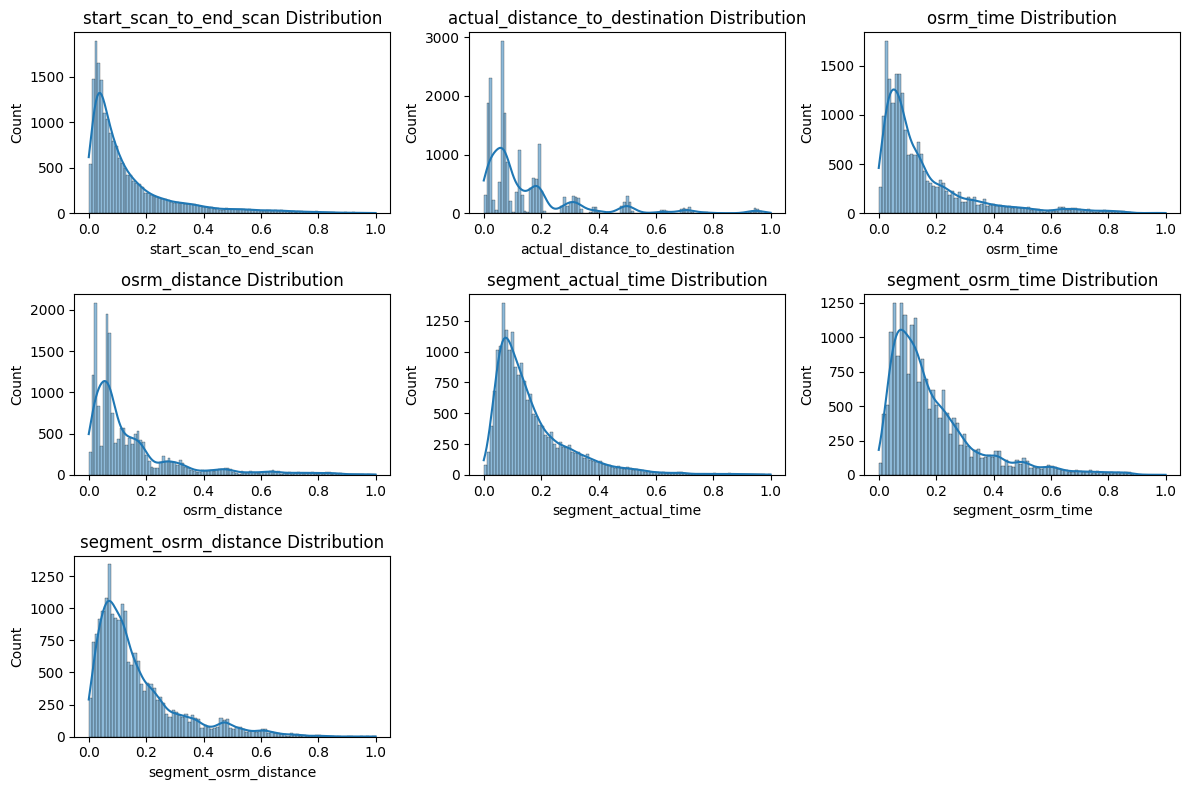

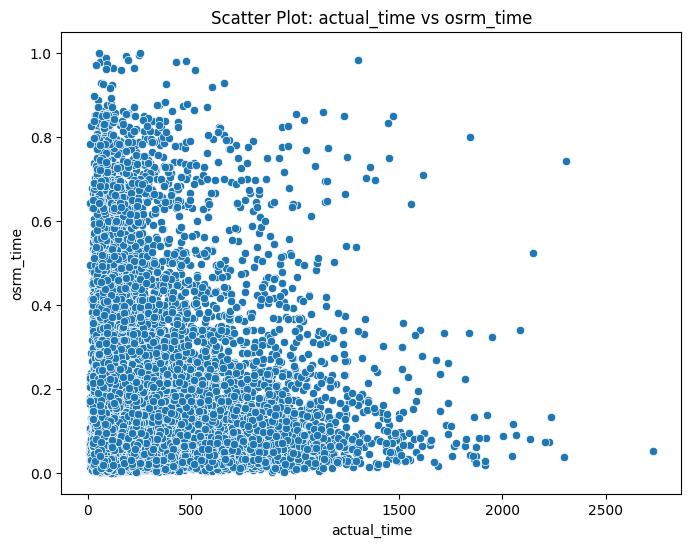

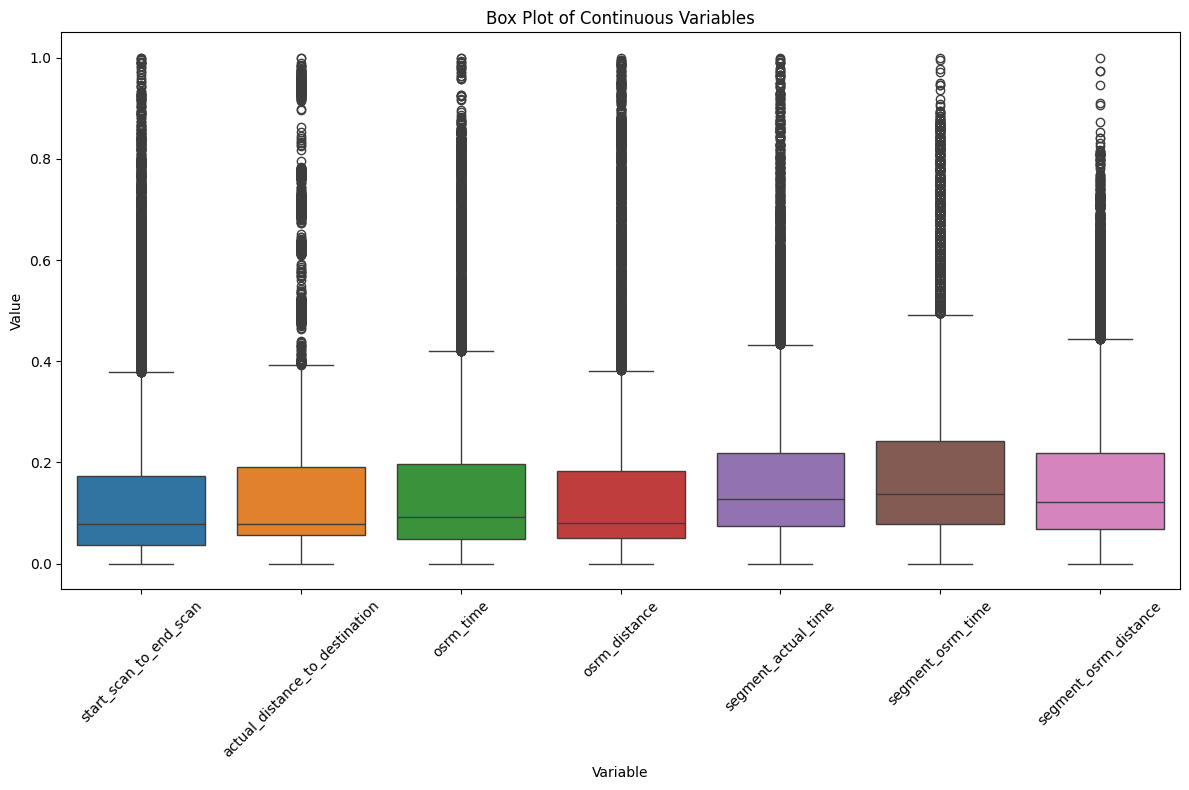

In [12]:

# Histogram or KDE plot for continuous variables
plt.figure(figsize=(12, 8))
for i, col in enumerate(continuous_columns, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data=encoded_data, x=col, kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

# Scatter plot of actual_time vs osrm_time
plt.figure(figsize=(8, 6))
sns.scatterplot(data=encoded_data, x='actual_time', y='osrm_time')
plt.title('Scatter Plot: actual_time vs osrm_time')
plt.xlabel('actual_time')
plt.ylabel('osrm_time')
plt.show()

# Box plot for continuous variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=encoded_data[continuous_columns])
plt.title('Box Plot of Continuous Variables')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Display the first few rows of the final processed data
encoded_data.head()

,segment_key,trip_uuid,route_type,source_name,destination_name,trip_creation_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,...,destination_center_IND852131AAA,destination_center_IND852139AAB,destination_center_IND852201AAA,destination_center_IND853204AAA,destination_center_IND854105AAA,destination_center_IND854105AAB,destination_center_IND854311AAA,destination_center_IND854326AAB,destination_center_IND854334AAA,destination_center_IND854335AAA
2,trip-153671042288605164_IND561203AAB_IND562101AAA,trip-153671042288605164,Carting,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22.886430,0.039964,0.030805,96.0,0.025000,...,False,False,False,False,False,False,False,False,False,False
3,trip-153671042288605164_IND572101AAA_IND561203AAB,trip-153671042288605164,Carting,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,0.097441,0.185006,303.0,0.126389,...,False,False,False,False,False,False,False,False,False,False
6,trip-153671046011330457_IND400072AAB_IND401104AAA,trip-153671046011330457,Carting,Mumbai Hub (Maharashtra),Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00.113710,0.022003,0.025452,82.0,0.018056,...,False,False,False,False,False,False,False,False,False,False
7,trip-153671052974046625_IND583101AAA_IND583201AAA,trip-153671052974046625,FTL,Bellary_Dc (Karnataka),Hospet (Karnataka),2018-09-12 00:02:09.740725,0.024023,0.000426,277.0,0.006944,...,False,False,False,False,False,False,False,False,False,False
8,trip-153671052974046625_IND583119AAA_IND583101AAA,trip-153671052974046625,FTL,Sandur_WrdN1DPP_D (Karnataka),Bellary_Dc (Karnataka),2018-09-12 00:02:09.740725,0.017063,0.000156,182.0,0.009722,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Find the busiest corridor
busiest_corridor = data.groupby(['source_name', 'destination_name'], observed=False)['route_type'].count().idxmax()
print(f"The busiest corridor is from {busiest_corridor[0]} to {busiest_corridor[1]}")

busiest_corridor_encoded = encoded_data.groupby(['source_name', 'destination_name'], observed=False)['route_type'].count().idxmax()
print(f"The busiest corridor (encoded) is from {busiest_corridor_encoded[0]} to {busiest_corridor_encoded[1]}")


The busiest corridor is from Gurgaon_Bilaspur_HB (Haryana) to Bangalore_Nelmngla_H (Karnataka)
The busiest corridor (encoded) is from Bangalore_Nelmngla_H (Karnataka) to Bengaluru_KGAirprt_HB (Karnataka)


In [15]:

# Average distance and time between corridors
avg_distance_between_corridor = data.groupby(['source_name', 'destination_name'], observed=False)['actual_distance_to_destination'].mean()
avg_time_between_corridor = data.groupby(['source_name', 'destination_name'], observed=False)['actual_time'].mean()
print(f"Average distance between corridors: {avg_distance_between_corridor.mean()} Kms")
print(f"Average time taken between corridors: {avg_time_between_corridor.mean()}")

avg_distance_between_corridor_encoded = encoded_data.groupby(['source_name', 'destination_name'], observed=False)['actual_distance_to_destination'].mean()
avg_time_between_corridor_encoded = encoded_data.groupby(['source_name', 'destination_name'], observed=False)['actual_time'].mean()
print(f"Average distance between corridors (encoded): {avg_distance_between_corridor_encoded.mean()} Kms")
print(f"Average time taken between corridors (encoded): {avg_time_between_corridor_encoded.mean()}")

Average distance between corridors: 51.5385851159853 Kms
Average time taken between corridors: 119.01870587893055
Average distance between corridors (encoded): 0.15525961756531734 Kms
Average time taken between corridors (encoded): 261.8564295738579


---

**Business Insights & Recommendations**

---

**1. Patterns Observed and Inferences**

**Origin of Orders:**
The analysis reveals that a significant majority of orders originate from specific states or centers. By aggregating data based on `source_name`, `source_center`, and `source_state`, we can pinpoint the regions contributing the highest order volumes.

**Busiest Corridor:**
The busiest corridor identified is from Gurgaon_Bilaspur_HB (Haryana) to Bangalore_Nelmngla_H (Karnataka). This corridor experiences the highest volume of traffic or transactions, indicating a substantial flow of goods or services.

**Average Distance and Time Between Corridors:**
- **Average Distance:** Approximately 51.54 kilometers
- **Average Time Taken:** Approximately 119.02 units (hours, minutes, etc., based on data context)

**2. Actionable Recommendations**

**Route Optimization:**
- **Recommendation:** Focus on optimizing logistics routes and operations for the identified busiest corridor. Utilize data-driven insights to streamline processes, reduce transit times, and potentially lower operational costs.

**Regional Focus:**
- **Recommendation:** Direct marketing efforts and operational enhancements towards regions generating the highest order volumes. Consider tailored service offerings, infrastructure improvements, and strategic partnerships to enhance service delivery efficiency.

**Enhancing Customer Experience:**
- **Recommendation:** Align service level expectations with actual performance metrics derived from average distance and time between corridors. Improve delivery promises based on reliable data to enhance overall customer satisfaction.

**Data-Driven Decision Making:**
- **Recommendation:** Continue leveraging data analytics to monitor corridor performance, detect emerging trends, and make informed decisions. Implement proactive adjustments in capacity planning and operational strategies to address potential bottlenecks effectively.

**Operational Efficiency Improvements:**
- **Recommendation:** Implement operational enhancements based on insights from outlier detection and hypothesis testing. Focus on refining processes related to scanning, distance estimation, and time predictions to optimize resource utilization and accuracy.

---

Implementing these recommendations will enable the business to capitalize on identified opportunities, enhance operational efficiency, and improve overall service delivery. This strategic approach will foster greater customer satisfaction and strengthen the business's competitive position in the logistics industry.